# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv("../data/checker_submits.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        1686 non-null   object
 1   labname    1686 non-null   object
 2   numTrials  1686 non-null   int64 
 3   timestamp  1686 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.8+ KB


,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [3]:
#df["full_date"] = pd.to_datetime(df["timestamp"])
#df["date"] = df["full_date"].dt.date
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df = df.drop(columns="timestamp")
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        1686 non-null   object
 1   labname    1686 non-null   object
 2   numTrials  1686 non-null   int64 
 3   hour       1686 non-null   int64 
 4   dayofweek  1686 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 66.0+ KB


In [5]:
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [6]:
encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

In [7]:
numeric = ["numTrials", "hour"]
category = ["uid", "labname"]

In [8]:
enc = encoder.fit_transform(df[category])
enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [9]:
encoder.get_feature_names_out()

array(['uid_user_0', 'uid_user_1', 'uid_user_10', 'uid_user_11',
       'uid_user_12', 'uid_user_13', 'uid_user_14', 'uid_user_15',
       'uid_user_16', 'uid_user_17', 'uid_user_18', 'uid_user_19',
       'uid_user_2', 'uid_user_20', 'uid_user_21', 'uid_user_22',
       'uid_user_23', 'uid_user_24', 'uid_user_25', 'uid_user_26',
       'uid_user_27', 'uid_user_28', 'uid_user_29', 'uid_user_3',
       'uid_user_30', 'uid_user_31', 'uid_user_4', 'uid_user_6',
       'uid_user_7', 'uid_user_8', 'labname_code_rvw', 'labname_lab02',
       'labname_lab03', 'labname_lab03s', 'labname_lab05s',
       'labname_laba04', 'labname_laba04s', 'labname_laba05',
       'labname_laba06', 'labname_laba06s', 'labname_project1'],
      dtype=object)

In [10]:
df
df2 = pd.DataFrame(enc, columns=encoder.get_feature_names_out())
df2

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df_enc = pd.concat((df.drop(columns=category), df2), axis=1)
df_enc

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
df_enc[numeric] = scaler.fit_transform(df[numeric])
df_enc

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numTrials         1686 non-null   float64
 1   hour              1686 non-null   float64
 2   dayofweek         1686 non-null   int64  
 3   uid_user_0        1686 non-null   float64
 4   uid_user_1        1686 non-null   float64
 5   uid_user_10       1686 non-null   float64
 6   uid_user_11       1686 non-null   float64
 7   uid_user_12       1686 non-null   float64
 8   uid_user_13       1686 non-null   float64
 9   uid_user_14       1686 non-null   float64
 10  uid_user_15       1686 non-null   float64
 11  uid_user_16       1686 non-null   float64
 12  uid_user_17       1686 non-null   float64
 13  uid_user_18       1686 non-null   float64
 14  uid_user_19       1686 non-null   float64
 15  uid_user_2        1686 non-null   float64
 16  uid_user_20       1686 non-null   float64


In [14]:
df_enc.to_csv("../data/dayofweek.csv", index=False)

In [15]:
pd.read_csv("../data/dayofweek.csv")

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df_enc["dayofweek"].value_counts().idxmax()

3

In [17]:
df["naive"] = df_enc["dayofweek"].value_counts().idxmax()
naive = accuracy_score(df["dayofweek"], df["naive"])
naive

0.23487544483985764

In [18]:
df.drop(columns=["naive"], inplace=True)

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [19]:
target = df_enc["dayofweek"]
features = df_enc.drop(columns=["dayofweek"])

In [20]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(features, target)
predict = model.predict(features)
accuracy_score(target, predict)

0.6405693950177936

In [21]:
model = LogisticRegression(random_state=21, fit_intercept=False, solver="liblinear")
model.fit(features, target)
predict = model.predict(features)
accuracy_score(target, predict)

0.6215895610913404

In [22]:
def draws_barh(coefs, features, n, b=True):
    if b==True:
        cf = abs(coefs).sum(axis=0)
    else:
        cf = abs(coefs)
    fig, ax = plt.subplots(figsize=(15, 8))
    indices = cf.argsort()[::-1][:n]
    ax.barh(np.arange(n), cf[indices], color="g")
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis()
    plt.show()

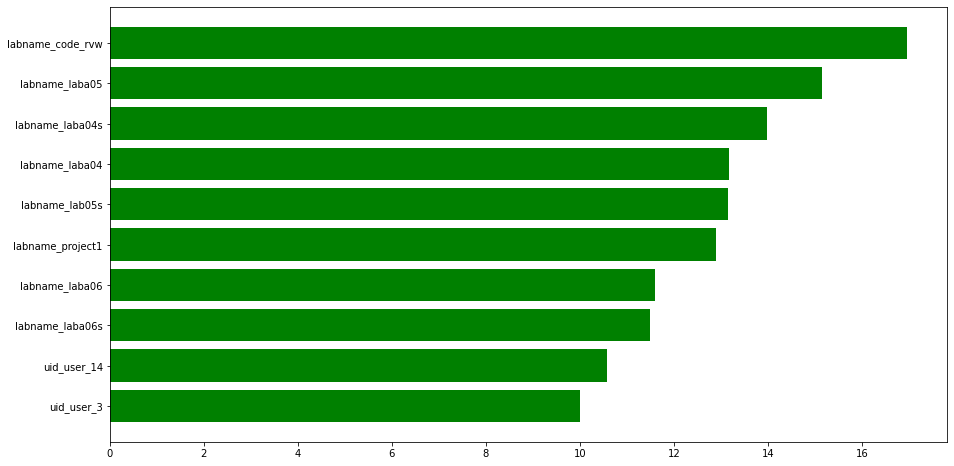

In [23]:
draws_barh(model.coef_, features.columns, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [24]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
for k in kernel:
    model = svm.SVC(random_state=21, probability=True, kernel=k)
    model.fit(features, target)
    #df["svm_predict"] = model.predict(features_scaled)
    print(k, model.score(features, target))

linear 0.702846975088968
poly 0.8594306049822064
rbf 0.8558718861209964
sigmoid 0.3997627520759193


In [25]:
model = svm.SVC(random_state=21, probability=True, kernel="linear")
model.fit(features, target)
df["svm_predict"] = model.predict(features)
print("linear", model.score(features, target))

linear 0.702846975088968


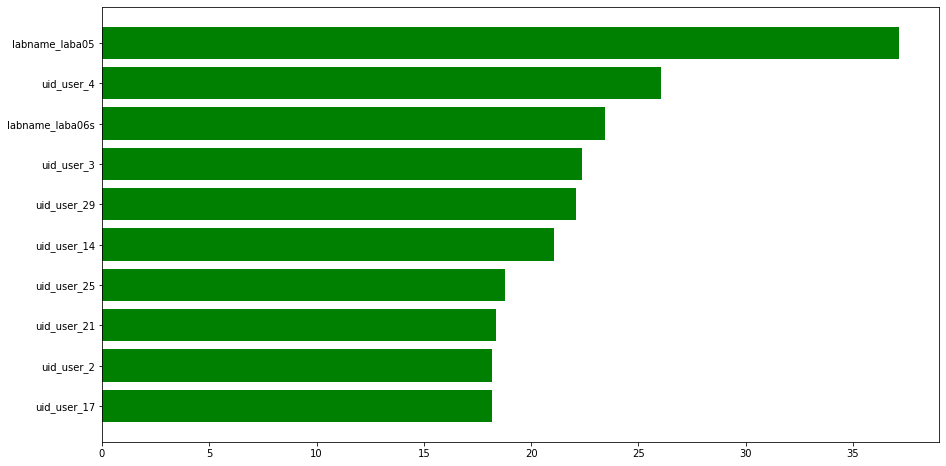

In [26]:
draws_barh(model.coef_, features.columns, 10)

In [27]:
OneVsRest = OneVsRestClassifier(model).fit(features, target)


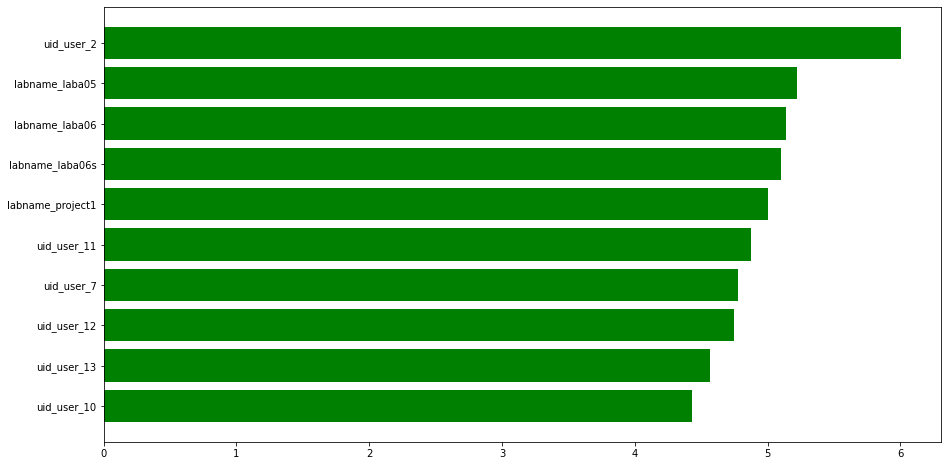

In [28]:
draws_barh(OneVsRest.coef_, features.columns, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [29]:
for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(features, target)
    print(i, model.score(features, target))

1 0.35765124555160144
2 0.4389086595492289
3 0.48991696322657174
4 0.5516014234875445
5 0.6109134045077106
6 0.6637010676156584
7 0.7064056939501779
8 0.7502965599051008
9 0.7846975088967971


In [30]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(features, target)
model.score(features, target)

0.5516014234875445

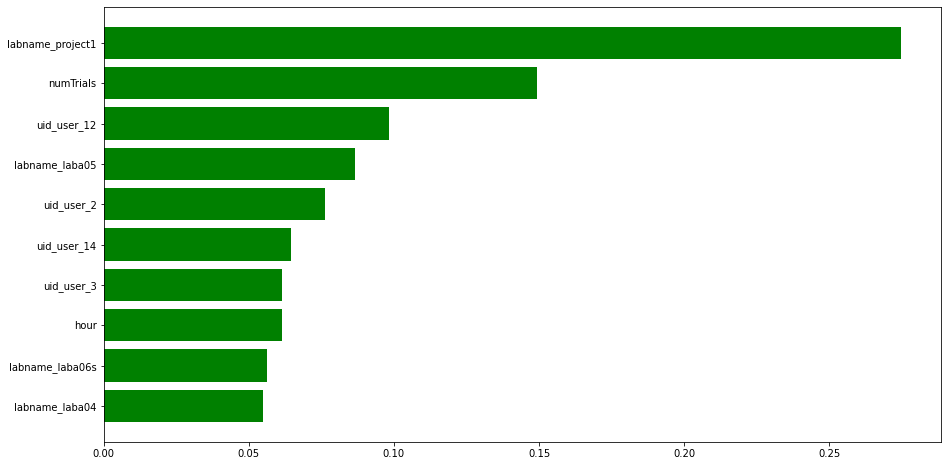

In [31]:
draws_barh(model.feature_importances_, features.columns, 10, False)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [32]:
model = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
model.fit(features, target)
model.score(features, target)

1.0

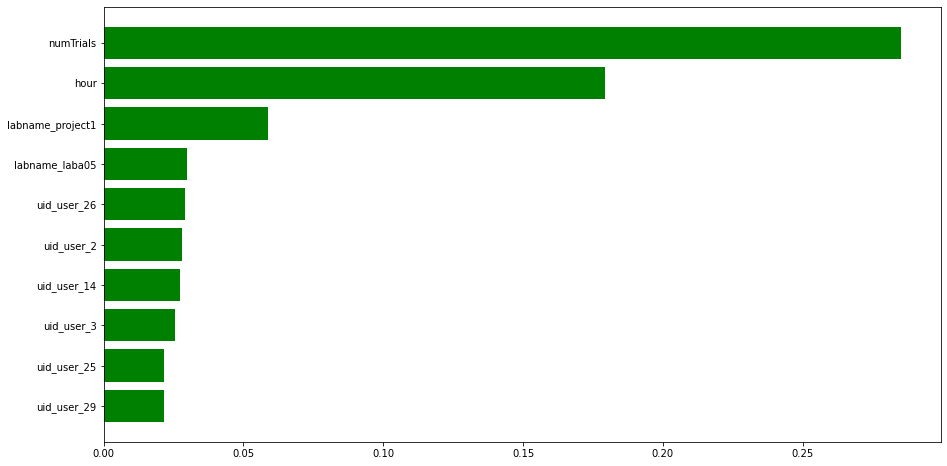

In [33]:
draws_barh(model.feature_importances_, features.columns, 10, False)

In [34]:
for i in (1, 10, 50, 100):
    for j in (1, 5, 10, 25):
        model = RandomForestClassifier(n_estimators=i, max_depth = j, random_state=21)
        model.fit(features, target)
        model.score(features, target)
        print("n_estimators: ", i, " max_depth: ", j, "score: ", model.score(features, target))

n_estimators:  1  max_depth:  1 score:  0.2508896797153025
n_estimators:  1  max_depth:  5 score:  0.42526690391459077
n_estimators:  1  max_depth:  10 score:  0.66785290628707
n_estimators:  1  max_depth:  25 score:  0.9489916963226572
n_estimators:  10  max_depth:  1 score:  0.37129300118623965
n_estimators:  10  max_depth:  5 score:  0.603202846975089
n_estimators:  10  max_depth:  10 score:  0.8285883748517201
n_estimators:  10  max_depth:  25 score:  0.9958481613285883
n_estimators:  50  max_depth:  1 score:  0.38730723606168443
n_estimators:  50  max_depth:  5 score:  0.5848161328588375
n_estimators:  50  max_depth:  10 score:  0.8701067615658363
n_estimators:  50  max_depth:  25 score:  1.0
n_estimators:  100  max_depth:  1 score:  0.38730723606168443
n_estimators:  100  max_depth:  5 score:  0.5794780545670225
n_estimators:  100  max_depth:  10 score:  0.8855278766310795
n_estimators:  100  max_depth:  25 score:  1.0
